# **<h1 align="center">Projet `Finite Mixtures & Co-clustering`</h1>**

<h2 align="center">🤖 Maroua GHAOUAT 🤖</h2>
<h3 align="center"><code>AMSD</code></h3>

    
## Objectif du Projet
BBC News est un ensemble de données composé d'articles de presse. Pour ce projet, nous explorerons deux formats de données différents : 1) une matrice de document-terme, et 2) des embeddings de documents générés à l'aide du modèle JOSE. Le fichier bbc_dataset.mat comprend ces deux formats ainsi que les labels, qui serviront à évaluer les performances des algorithmes de clustering utilisés.
## Composantes du Projet

Les sections que nous aborderons dans ce projet sont :

* K-Means simple
* Spherical K-Means  
* L'algorithme EM

---

# Installation des librairies et chargement des données

In [ ]:
# Charger les bibliothèques nécessaires
install.packages(c("R.matlab", "NbClust", "skmeans", "movMF","mclust","cluster","aricode"))
library(R.matlab)
library(NbClust)
library(skmeans)
library(movMF)
library(cluster)
library(mclust)
library(aricode)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.utils’, ‘clue’


R.matlab v3.7.0 (2022-08-25 21:52:34 UTC) successfully loaded. See ?R.matlab for help.


Attaching package: ‘R.matlab’


The following objects are masked from ‘package:base’:

    getOption, isOpen




In [ ]:
# Télécharger le fichier bbc_dataset.mat
url <- "https://cifre.s3.eu-north-1.amazonaws.com/bbc_dataset.mat"
destination_file <- "bbc_dataset.mat"
download.file(url, destfile = destination_file, method = "auto")

In [ ]:
# Charger les données depuis le fichier
bbc_dataset <- readMat(destination_file)

bbc_jose <- bbc_dataset$jose
bbc_doc_term <- bbc_dataset$doc.term

bbc_labels <- as.vector(bbc_dataset$labels)

---
# 1. Dimension des datasets :

In [ ]:
# Document-terme
dim_bbc_doc_term <- dim(bbc_doc_term)
cat("Nombre de documents dans bbc_doc_term :", dim_bbc_doc_term[1], "\n")
cat("Nombre de mots dans bbc_doc_term (taille de la dimension) :", dim_bbc_doc_term[2], "\n")

# Embeddings
dim_bbc_jose <- dim(bbc_jose)
cat("Nombre de documents dans bbc_jose :", dim_bbc_jose[1], "\n")
cat("Nombre de mots dans bbc_jose (taille de la dimension) :", dim_bbc_jose[2], "\n")

Nombre de documents dans bbc_jose : 2225 
Nombre de mots dans bbc_jose (taille de la dimension) : 100 
Nombre de documents dans bbc_doc_term : 2225 
Nombre de mots dans bbc_doc_term (taille de la dimension) : 2000 


# 2. Exécuter tous les algorithmes de clustering avec le vrai nombre de classes (5)
## 2.1. K-means
### 2.1.1 K-means sur la matrice document-terme


In [ ]:
# K-means
# kmeans_clusters_docterm <- kmeans(bbc_doc_term, centers = 5)$cluster
kmeans_clusters_docterm <- NbClust(bbc_doc_term, method = "kmeans", distance = "euclidean", index = "silhouette", min.nc = 5, max.nc = 5)$Best.partition

# Matrice de confusion
cat("Matrice de confusion du k-means sur la matrice document-terme :")
table(bbc_labels, kmeans_clusters_docterm)

# NMI
nmi_km_docterm<-NMI(kmeans_clusters_docterm, bbc_labels)
cat("NMI du k-means sur la matrice document-terme :",nmi_km_docterm)
cat("\n")
# ARI
ari_km_docterm<-ARI(kmeans_clusters_docterm,bbc_labels)
cat("ARI du k-means sur la matrice document-terme :",ari_km_docterm)

Matrice de confusion du k-means sur la matrice document-terme :

          kmeans_clusters_docterm
bbc_labels   1   2   3   4   5
         0 155   1 131  52  62
         1 208   0  71 219  12
         2 155   0  53 284  19
         3 118   3  45 216   4
         4 137   3 192  72  13

NMI du k-means sur la matrice document-terme : 0.07111618
ARI du k-means sur la matrice document-terme : 0.05932244

In [ ]:
# K-means
# kmeans_clusters_docterm <- kmeans(bbc_doc_term, centers = 5)$cluster
kmeans_clusters_docterm <- NbClust(bbc_doc_term, method = "kmeans", distance = "euclidean", index = "silhouette", min.nc = 5, max.nc = 5)$Best.partition

# Matrice de confusion
cat("Matrice de confusion du k-means sur la matrice document-terme :")
table(bbc_labels, kmeans_clusters_docterm)

# NMI
nmi_km_docterm<-NMI(kmeans_clusters_docterm, bbc_labels)
cat("NMI du k-means sur la matrice document-terme :",nmi_km_docterm)
cat("\n")
# ARI
ari_km_docterm<-ARI(kmeans_clusters_docterm,bbc_labels)
cat("ARI du k-means sur la matrice document-terme :",ari_km_docterm)

Matrice de confusion du k-means sur la matrice document-terme :

          kmeans_clusters_docterm
bbc_labels   1   2   3   4   5
         0   1 155  52 131  62
         1   0 209 218  71  12
         2   0 156 283  53  19
         3   3 120 214  45   4
         4   3 137  72 192  13

NMI du k-means sur la matrice document-terme : 0.07069438
ARI du k-means sur la matrice document-terme : 0.0587591

### 2.1.2 K-means sur les embeddings

In [ ]:
# K-means
kmeans_clusters_jose <- NbClust(bbc_jose, method = "kmeans", distance = "euclidean", index = "silhouette", min.nc = 5, max.nc = 5)$Best.partition
  # kmeans(bbc_jose, centers = 5)$cluster

# Matrice de confusion
cat("Matrice de confusion du k-means sur les embeddings :")
table(bbc_labels, kmeans_clusters_jose)

# NMI
nmi_km_jose<-NMI(kmeans_clusters_jose,bbc_labels)
cat("NMI du k-means sur les embeddings :",nmi_km_jose)
cat("\n")
# ARI
ari_km_jose<-ARI(kmeans_clusters_jose,bbc_labels)
cat("ARI du k-means sur les embeddings :",ari_km_jose)

Matrice de confusion du k-means sur les embeddings :

          kmeans_clusters_jose
bbc_labels   1   2   3   4   5
         0  10   1   9   4 377
         1 481   0   3  15  11
         2   3 501   5   2   0
         3   1   1 370   4  10
         4   9   4   2 396   6

NMI du k-means sur les embeddings : 0.8572789
ARI du k-means sur les embeddings : 0.8938261

## 2.2. Spherical K-means
### 2.2.1 Spherical K-means sur la matrice document-terme

In [ ]:
# SK-means
skmeans_clusters_docterm <- skmeans(bbc_doc_term, 5)$cluster

# Matrice de confusion
cat("Matrice de confusion du Spherical k-means sur la matrice document-terme  :")
table(bbc_labels, skmeans_clusters_docterm)

# NMI
nmi_skm_docterm<-NMI(skmeans_clusters_docterm,bbc_labels)
cat("NMI du Spherical k-means sur la matrice document-terme :",nmi_skm_docterm)
cat("\n")
# ARI
ari_skm_docterm<-ARI(skmeans_clusters_docterm,bbc_labels)
cat("ARI du Spherical k-means sur la matrice document-terme :",ari_skm_docterm)

Matrice de confusion du Spherical k-means sur la matrice document-terme  :

          skmeans_clusters_docterm
bbc_labels   1   2   3   4   5
         0  11  95 267  26   2
         1  23 143 124 220   0
         2   3 105  18  85 300
         3  29 233  36  59  29
         4 203  92 106  11   5

NMI du Spherical k-means sur la matrice document-terme : 0.2729315
ARI du Spherical k-means sur la matrice document-terme : 0.2086041

### 2.2.2 Spherical K-means sur les embeddings :

In [ ]:
# SK-means
skmeans_clusters_jose <- skmeans(bbc_jose, 5)$cluster

# Matrice de confusion
cat("Matrice de confusion du Spherical k-means sur les embeddings  :")
table(bbc_labels, skmeans_clusters_jose)

# NMI
nmi_skm_jose<-NMI(skmeans_clusters_jose,bbc_labels)
cat("NMI du Spherical k-means sur les embeddings :",nmi_skm_jose)
cat("\n")
# ARI
ari_skm_jose<-ARI(skmeans_clusters_jose,bbc_labels)
cat("ARI du Spherical k-means sur les embeddings :",ari_skm_jose)

Matrice de confusion du Spherical k-means sur les embeddings  :

          skmeans_clusters_jose
bbc_labels   1   2   3   4   5
         0 375   9  11   1   5
         1  11   3 479   1  16
         2   0   4   3 502   2
         3   9 366   6   1   4
         4   6   2   9   4 396

NMI du Spherical k-means sur les embeddings : 0.8476665
ARI du Spherical k-means sur les embeddings : 0.8863287

## 2.3. EM
### 2.3.1 EM sur la matrice document-terme

In [ ]:
# EM (movMF)
res_movMF_docterm <- movMF(bbc_doc_term, 5, nruns = 10, maxit = 100, kappa = list(common = TRUE))
movMF_clusters_docterm <- apply(res_movMF$P, 1, which.max)

# Matrice de confusion
cat("Matrice de confusion du EM sur la matrice document-terme  :")
table(bbc_labels, movMF_clusters_docterm)

# NMI
nmi_em_docterm<-NMI(movMF_clusters_docterm,bbc_labels)
cat("NMI du EM sur la matrice document-terme :",nmi_em_docterm)
cat("\n")
# ARI
ari_em_docterm<-ARI(movMF_clusters_docterm,bbc_labels)
cat("ARI du EM sur la matrice document-terme :",ari_em_docterm)

Matrice de confusion du EM sur la matrice document-terme  :

          movMF_clusters_docterm
bbc_labels   1   2   3   4   5
         0 373   5  12   2   9
         1  11  16 479   1   3
         2   0   2   3 502   4
         3   9   4   6   1 366
         4   6 396   9   4   2

NMI du EM sur la matrice document-terme : 0.8451155
ARI du EM sur la matrice document-terme : 0.8842357


### 2.3.2 EM sur les embeddings :

In [ ]:
# EM (movMF)
res_movMF_jose <- movMF(bbc_jose, 5, nruns = 10, maxit = 100, kappa = list(common = TRUE))
movMF_clusters_jose <- apply(res_movMF$P, 1, which.max)

# Matrice de confusion
cat("Matrice de confusion du EM sur les embeddings  :")
table(bbc_labels, movMF_clusters_jose)

# NMI
nmi_em_jose<-NMI(movMF_clusters_jose,bbc_labels)
cat("NMI du EM sur les embeddings :",nmi_em_jose)

# ARI
ari_em_jose<-ARI(movMF_clusters_jose,bbc_labels)
cat("\n")
cat("ARI du EM sur les embeddings :",ari_em_jose)

Matrice de confusion du EM sur les embeddings  :

          movMF_clusters_jose
bbc_labels   1   2   3   4   5
         0 373   5  12   2   9
         1  11  16 479   1   3
         2   0   2   3 502   4
         3   9   4   6   1 366
         4   6 396   9   4   2

NMI du EM sur les embeddings : 0.8451155
ARI du EM sur les embeddings : 0.8842357

## 5. Commentaires :

Dans leur article (Meng et al. 2019) ont précisé qu'il y a un écart intrigant entre la procédure d'entraînement et les utilisations pratiques des embeddings entrainé. Alors que les embeddings sont appris dans l'espace euclidien, c'est souvent la similarité directionnelle entre les vecteurs de mots qui capture plus efficacement la sémantique des mots.

Pour cela, il est courant d'utiliser la similarité cosinus comme mesure de similarité (JoSE) ou de normaliser d'abord les vecteurs de mots et de documents avant de calculer les similarités textuelles (Matrice document-terme).


* En projetant sur notre travail, sur le dataset BBC News, nous avons évalué les deux méthodes (sur trois algorithmes de clsutering : K-means, Spherical k-means et l'EM. Sur l'ensemble des algorithmes de clustering, nous remarquons toujours que les résultats d'évaluation en termes de NMI et ARI sont meilleurs en effectuant le clustering directement sur les embeddings avec l'algorithme JOSE que le clustering sur la matrice document-terme.
> Ceci est dû au fait qu'après la projection de l'embedding de l'espace euclidien à l'espace sphérique, la solution optimale à la fonction de perte dans l'espace d'origine peut ne pas rester optimale dans le nouvel espace.

* Nous remarquons que le k-means sur la matrice document-terme prend beaucoup de temps à s'exécuter par rapport au k-means sur les embeddings.
> Ce qui est logique vu qu'il se passe une étape supplémentaire de calcul d'embedding dans l'espace euclidien, ensuite la projection sur un nouvel espace pour avoir la similarité textuelle.


* En comparant entre les performances des trois algorithmes en termes de NMI et ARI, nous trouvons que EM > Spherical K-means > K-means (Or, sur le format d'embeddings, EM et Spherical K-means sont équivalents en termes de performances)
> Les données textuelles sont de nature directionnelles, ce qui fait que le Spherical k-means est mieux adapté à ces données que le k-means simple. Mais le Spherical k-means est dépassé par l'algorithme EM car ce dernier est particulièrement adapté pour modéliser des données distribuées selon une distribution de von Mises-Fisher, qui est couramment utilisée pour modéliser des données directionnelles dans l'espace sphérique. Cette distribution est souvent plus appropriée pour les embeddings de texte dans l'espace sphérique. De plus, en plus du clustering, l'algorithme EM effectue une estimation des paramètres du modèle (moyenne, concentration, etc.) par le biais de l'optimisation itérative de la log-vraisemblance. Cette approche peut permettre d'ajuster plus précisément les clusters aux données que Spherical K-Means, qui utilise une approche heuristique basée sur des distances angulaires.

# 6. L'algorithme EM avec d'autres nombre de clusters

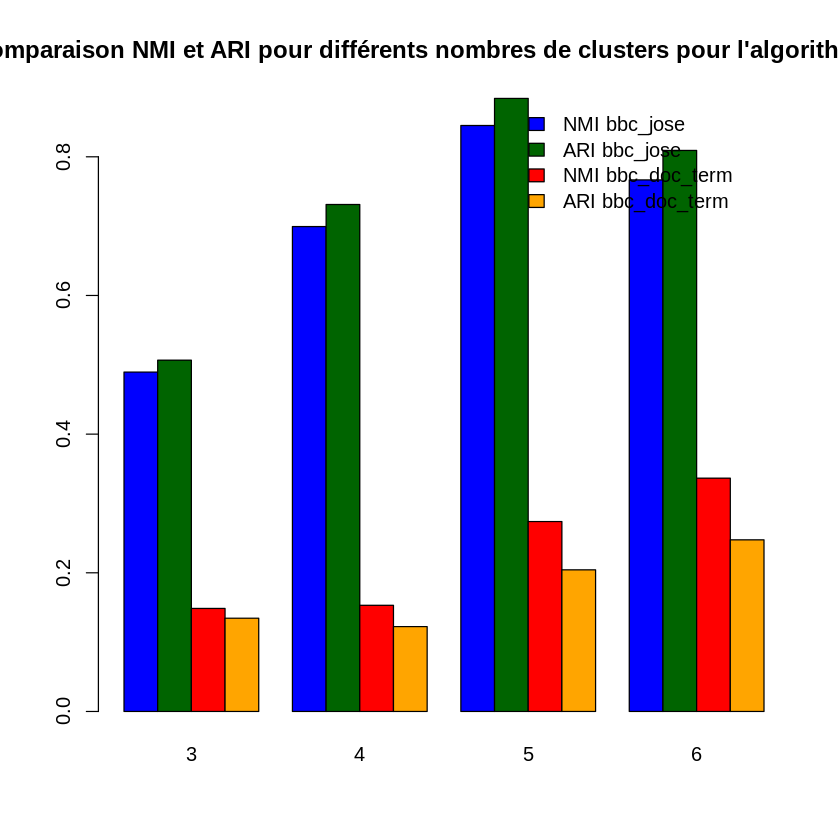

In [ ]:
# Fonction pour effectuer le clustering, calculer NMI et ARI, et renvoyer les résultats
perform_clustering <- function(data, labels, num_clusters) {
  # Exécuter le clustering EM (movMF)
  res_movMF <- movMF(data, num_clusters, nruns = 10, maxit = 100, kappa = list(common = TRUE))
  movMF_clusters <- apply(res_movMF$P, 1, which.max)

  # Calculer NMI et ARI
  nmi_value <- NMI(movMF_clusters, labels)
  ari_value <- ARI(movMF_clusters, labels)

  # Retourner les résultats
  return(list(nmi = nmi_value, ari = ari_value))
}

# Données
data_jose <- bbc_jose
data_doc_term <- bbc_doc_term
labels <- bbc_labels

# Nombre de clusters à tester
num_clusters_list <- c(3, 4, 5, 6)

# Initialiser des listes pour stocker les résultats
nmi_results_jose <- numeric(length(num_clusters_list))
ari_results_jose <- numeric(length(num_clusters_list))

nmi_results_docterm <- numeric(length(num_clusters_list))
ari_results_docterm <- numeric(length(num_clusters_list))

# Boucle sur différents nombres de clusters
for (i in seq_along(num_clusters_list)) {
  # Pour bbc_jose
  results_jose <- perform_clustering(data_jose, labels, num_clusters_list[i])
  nmi_results_jose[i] <- results_jose$nmi
  ari_results_jose[i] <- results_jose$ari

  # Pour bbc_doc_term
  results_docterm <- perform_clustering(data_doc_term, labels, num_clusters_list[i])
  nmi_results_docterm[i] <- results_docterm$nmi
  ari_results_docterm[i] <- results_docterm$ari
}

# Créer un bar plot
barplot(
  rbind(nmi_results_jose, ari_results_jose, nmi_results_docterm, ari_results_docterm),
  beside = TRUE,
  col = c("blue", "darkgreen", "red", "orange"),
  names.arg = num_clusters_list,
  legend.text = c("NMI bbc_jose", "ARI bbc_jose", "NMI bbc_doc_term", "ARI bbc_doc_term"),
  args.legend = list(x = "topright", bty = "n", inset = c(0.05, 0)),
  main = "Comparaison NMI et ARI pour différents nombres de clusters pour l'algorithme EM"
)


Nous voulons voir que donnera le meilleur algorithme de clustering : EM avec d'autres nombre de clusters. Nous effectuons le clustering pour un nombre  de clusters = 3, 4, 5 et 6.
En comparant les performances nous constatons que le meilleur nombre de clsuters adapté à notre dataset :
* Est égal à 5 sur le format des embeddings JoSE.
* Est égal à 6 sur le format de la amtrice document-terme.